In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
from scipy.io import mmread
from scanpy import AnnData
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
adata = sc.read('combined_Micro-PVM_AD2.h5ad')

In [4]:
adata.shape

(82486, 36601)

# Quality Control

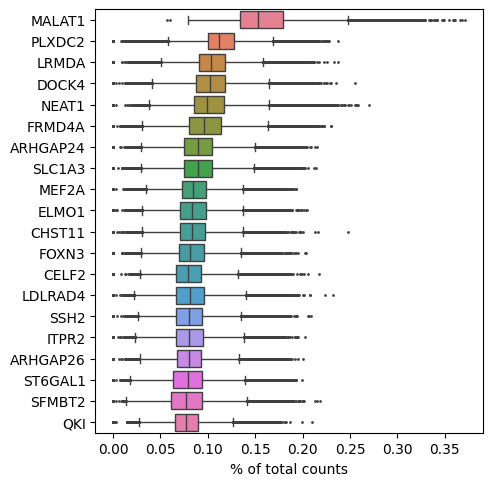

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [6]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

### Total Counts: sum of all counts in a cell

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


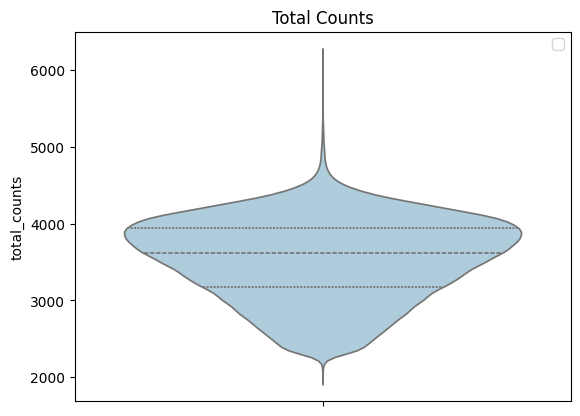

In [7]:
sns.violinplot(data=adata.obs, y="total_counts", color="#a6cee3", inner="quart")
plt.title("Total Counts")
plt.legend()

### Number of Genes: number of genes expressed

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


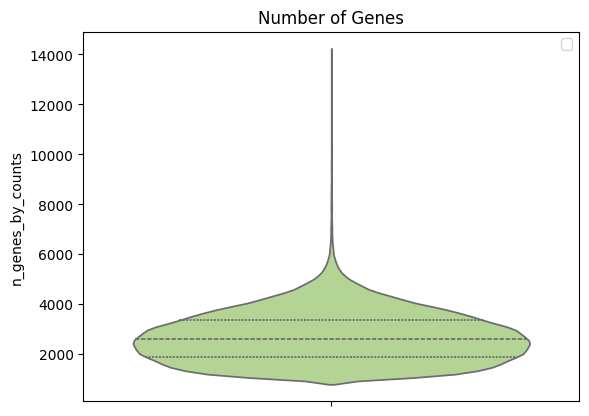

In [8]:
sns.violinplot(data=adata.obs, y="n_genes_by_counts", color="#b2df8a", inner="quart")
plt.title("Number of Genes")
plt.legend()

### Percent MT: percent of mitochondria

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


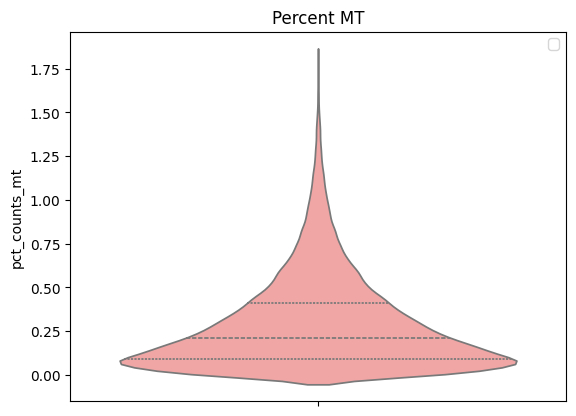

In [9]:
sns.violinplot(data=adata.obs, y="pct_counts_mt", color="#fb9a99", inner="quart")
plt.title("Percent MT")
plt.legend()

### Filter cells with less than 200 genes expressed and genes that are expressed in less than 3 cells.

In [10]:
# do not need visual
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [11]:
adata.var_names_make_unique()

### Cut off the top and bottom of the 'Number of Genes' plot becase there are too many or too little genes expressed. 

In [12]:
# need visual
adata = adata[adata.obs.n_genes_by_counts > 1000, :]
adata = adata[adata.obs.n_genes_by_counts < 5500, :]
adata.shape

(81891, 32852)

### Cut off the top of the 'Percent MT' plot because when the percent of mitchondria is too high, it might be mistaking a mitochondria for an individual cell.

In [13]:
# need visual
adata = adata[adata.obs.pct_counts_mt < 1.15, :].copy()
adata.shape

(80822, 32852)

### Replot to show the tails removed

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


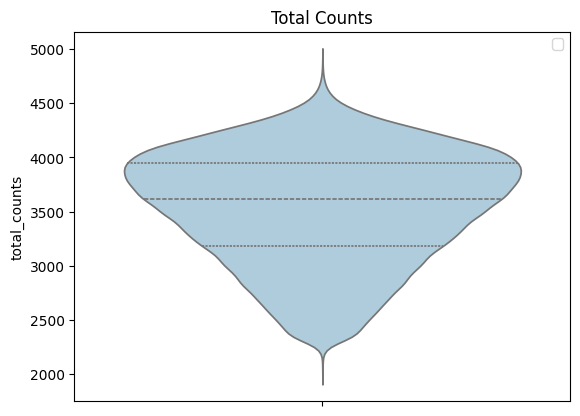

In [14]:
sns.violinplot(data=adata.obs, y="total_counts", color="#a6cee3", inner="quart")
plt.title("Total Counts")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


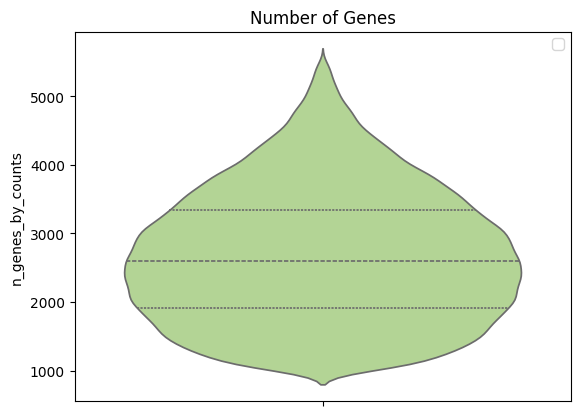

In [15]:
sns.violinplot(data=adata.obs, y="n_genes_by_counts", color="#b2df8a", inner="quart")
plt.title("Number of Genes")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


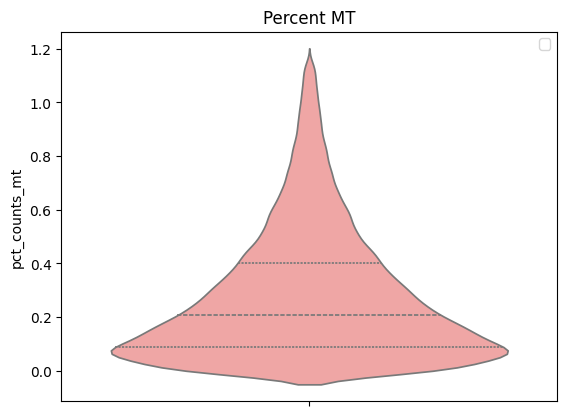

In [16]:
sns.violinplot(data=adata.obs, y="pct_counts_mt", color="#fb9a99", inner="quart")
plt.title("Percent MT")
plt.legend()

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [18]:
sc.pp.log1p(adata)

In [19]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

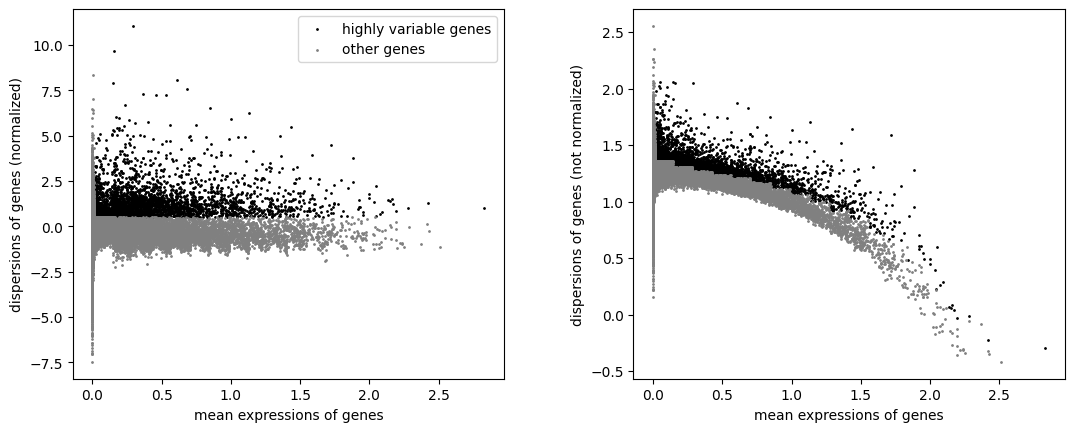

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

In [22]:
sc.pp.scale(adata, max_value=10)

In [23]:
sc.tl.pca(adata, svd_solver="arcpack")

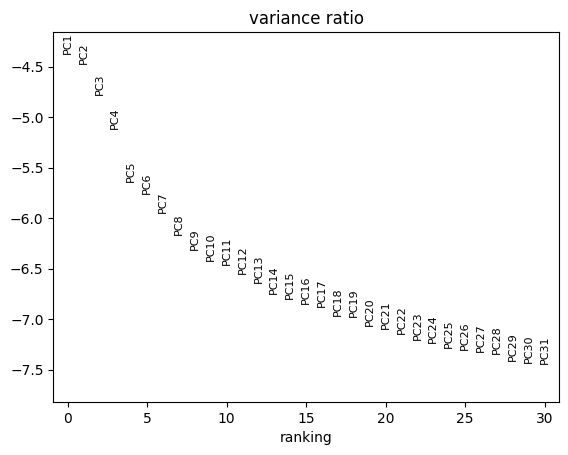

In [24]:
sc.pl.pca_variance_ratio(adata, log=True)

In [25]:
# number of neighbors should increase with increasing shape of the adata
# number of pcs should be where the graph above starts to flatline
sc.pp.neighbors(adata, n_neighbors=90, n_pcs=22)

### Generate umap and leiden clusters

In [26]:
sc.tl.umap(adata)

In [27]:
sc.tl.leiden(adata, resolution=1)

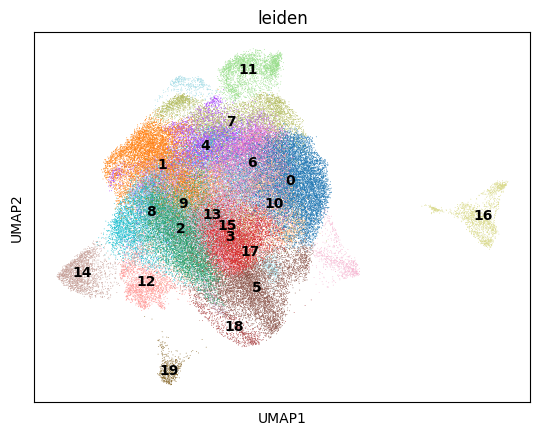

In [29]:
sc.pl.umap(adata, color="leiden", legend_loc="on data")

In [30]:
adata.shape

(80822, 32852)

### Plot the cognitive status onto the umap. This shows if the individual that the cell came from had dementia, no dementia (still had Alzheimer's Disease), or was a reference (did not have Alzheimer's Disease).

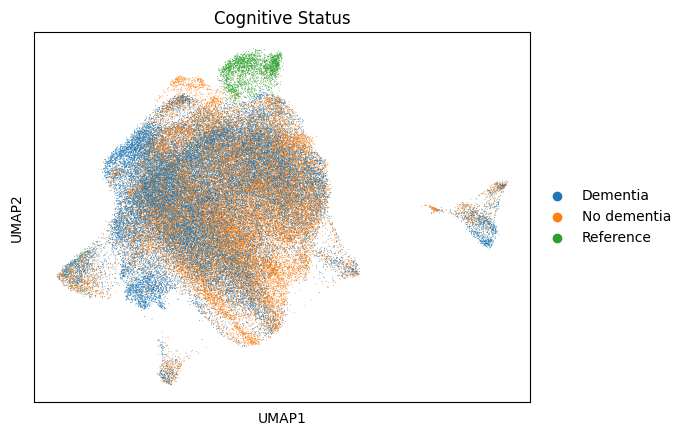

In [31]:
sc.pl.umap(adata, color='Cognitive Status')

### Make a new column in the adata that only labels the brain region and not the layer.

In [32]:
# only studying brain regions and not layers
adata.obs['merge_region']=adata.obs['Brain Region'].copy()
adata.obs['merge_region']=adata.obs['merge_region'].replace('Human MTG', 'MTG')
adata.obs['merge_region']=adata.obs['merge_region'].replace('Human MTG_L5', 'MTG')
adata.obs['merge_region']=adata.obs['merge_region'].replace('Human MTG All Layers', 'MTG')
adata.obs['merge_region']=adata.obs['merge_region'].replace('Human DFC_all_layers', 'DFC')

### Plot the relabled brain regions onto the umap.

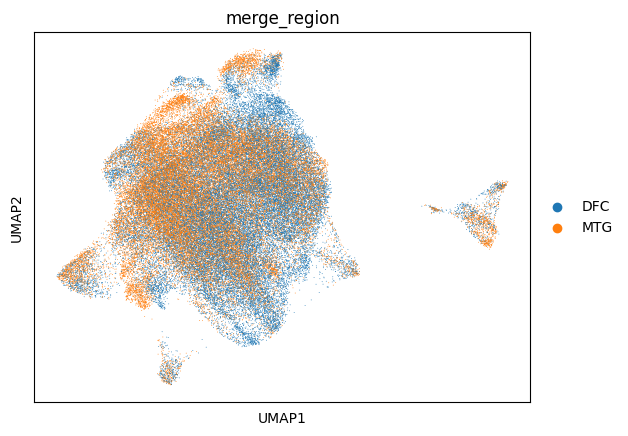

In [33]:
sc.pl.umap(adata, color="merge_region")

In [34]:
#adata.write_h5ad("processed_Micro-PVM_AD.h5ad")